In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'


In [11]:

adata = sc.read_h5ad('../session2/input_data/adata_course_part1.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'


In [3]:
import os
print(os.getcwd())

/home/stefan.futterknecht/Documents/data_analysis_course/nbks


In [5]:
display(adata.obs.head())
display(adata.var.head())

,initial_size_spliced,initial_size_unspliced,initial_size,fraction_mito,n_genes,num_spliced,num_ambiguous,num_unspliced,fraction_spliced,is_cell,is_high_quality,is_nonambient,is_not_debris,soupc_rho,sample
AAACCCAAGTTGGCGA-rd10,5801,2365,5801,0.053433,3142,5727,558,2365,0.662081,1,1,1,1,0.241,rd10
AAACCCACAGAAACCG-rd10,1352,1174,1352,0.029447,1071,1337,153,1174,0.501877,1,1,1,1,0.241,rd10
AAACCCAGTGCCGTAC-rd10,1007,886,1007,0.039137,935,996,99,886,0.502776,1,1,1,1,0.241,rd10
AAACCCATCGCGCCAA-rd10,1652,2560,1652,0.120705,1409,1605,234,2560,0.364856,1,1,1,1,0.241,rd10
AAACGAAAGCAACCAG-rd10,1528,1564,1528,0.031646,1360,1517,158,1564,0.468354,1,1,1,1,0.241,rd10


,gene_ids,feature_types,soup_profile
Pcmtd1,ENSMUSG00000051285,Gene Expression,6.692449e-05
Cdh7,ENSMUSG00000026312,Gene Expression,1.499708e-06
Exo1,ENSMUSG00000039748,Gene Expression,1.874636e-07
Becn2,ENSMUSG00000104158,Gene Expression,0.000000e+00
Uxs1,ENSMUSG00000057363,Gene Expression,9.935569e-06


In [21]:
print(adata.layers["unspliced"][5247, 16984])
print(adata.layers["spliced"][5247, 16984])
adata.var.iloc[16984,]

13
5771


gene_ids         ENSMUSG00000021647
feature_types       Gene Expression
soup_profile               0.000181
Name: Cartpt, dtype: object

In [8]:
# Indices for the gene and cell
gene_index = 16984
cell_index = 5247

# Access the spliced and unspliced read counts
spliced_counts = adata.layers['spliced'][cell_index, gene_index]
unspliced_counts = adata.layers['unspliced'][cell_index, gene_index]

# Find the gene name
gene_name = adata.var_names[gene_index]

# Display the results
print(f"Gene name: {gene_name}")
print(f"Spliced reads: {spliced_counts}")
print(f"Unspliced reads: {unspliced_counts}")

Gene name: Cartpt
Spliced reads: 5771
Unspliced reads: 13


In [17]:
display(adata.obs["sample"].size)
display(adata.obs["sample"].value_counts())
adata.obs["sample"].value_counts() * 100 / adata.obs["sample"].size

14878

wt      8000
rd10    6878
Name: sample, dtype: int64

wt      53.770668
rd10    46.229332
Name: sample, dtype: float64

(array([1.110e+02, 4.790e+02, 4.950e+02, 4.560e+02, 4.660e+02, 4.690e+02,
        5.840e+02, 7.270e+02, 8.620e+02, 9.260e+02, 1.053e+03, 1.051e+03,
        8.190e+02, 6.570e+02, 4.470e+02, 3.120e+02, 2.150e+02, 1.970e+02,
        1.670e+02, 1.470e+02, 1.400e+02, 1.370e+02, 1.480e+02, 1.570e+02,
        1.500e+02, 1.640e+02, 1.830e+02, 1.950e+02, 1.580e+02, 1.600e+02,
        1.450e+02, 1.640e+02, 1.410e+02, 1.780e+02, 1.390e+02, 1.330e+02,
        1.060e+02, 1.100e+02, 9.000e+01, 9.400e+01, 8.600e+01, 7.400e+01,
        6.800e+01, 7.600e+01, 6.000e+01, 4.700e+01, 6.300e+01, 3.500e+01,
        3.800e+01, 3.400e+01, 4.300e+01, 4.200e+01, 2.800e+01, 2.900e+01,
        1.800e+01, 1.600e+01, 1.800e+01, 2.800e+01, 2.600e+01, 1.600e+01,
        2.400e+01, 1.900e+01, 1.400e+01, 1.300e+01, 1.300e+01, 1.300e+01,
        9.000e+00, 9.000e+00, 8.000e+00, 8.000e+00, 5.000e+00, 1.500e+01,
        7.000e+00, 1.000e+01, 3.000e+00, 9.000e+00, 1.100e+01, 1.000e+01,
        4.000e+00, 1.200e+01, 5.000e+0

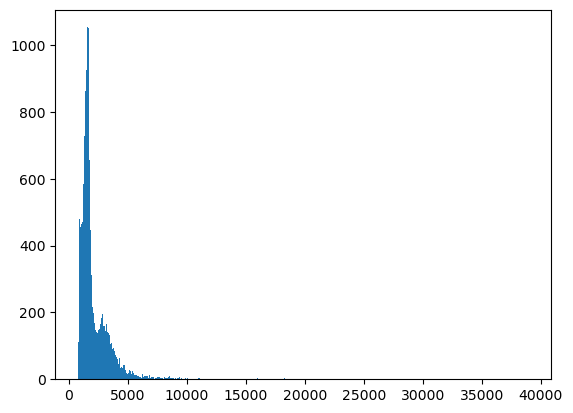

In [24]:
adata.obs['total_counts'] = adata.X.sum(axis=1)

import matplotlib.pyplot as plt

plt.hist(adata.obs['total_counts'], bins=500)